# Correción parcial (corte 1)
*Parte práctica*


*Camila Andrea Galvis Urrego 2238211*

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [22]:
base = pd.read_csv('student-mat.csv', 
                 sep = ';',
                 index_col=False,
                 error_bad_lines=False,
                 )
base.head()

school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]

## Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex - student's sex (binary: "F" - female or "M" - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: "U" - urban or "R" - rural)

5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12 guardian - student's guardian (nominal: "mother", "father" or "other")

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

## These grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets 

These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


## Primer punto 

¿Existen valores vacíos o nulos para alguna de las variables del dataset?

In [23]:
len(base)
base.sample(395)
valores_faltantes = base.isnull().sum()
valores_faltantes

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [24]:
pd.isnull(base)

school    sex    age  address  ...  absences     G1     G2     G3
0     False  False  False    False  ...     False  False  False  False
1     False  False  False    False  ...     False  False  False  False
2     False  False  False    False  ...     False  False  False  False
3     False  False  False    False  ...     False  False  False  False
4     False  False  False    False  ...     False  False  False  False
..      ...    ...    ...      ...  ...       ...    ...    ...    ...
390   False  False  False    False  ...     False  False  False  False
391   False  False  False    False  ...     False  False  False  False
392   False  False  False    False  ...     False  False  False  False
393   False  False  False    False  ...     False  False  False  False
394   False  False  False    False  ...     False  False  False  False

[395 rows x 33 columns]

*No existen valores faltantes o nulos en la base*

## Segundo punto
¿Cuántos estudiantes viven en zona urbana o rural? ¿Cuántos de los estudiantes rurales son mujeres y cuántas son hombres?

In [25]:
base['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

*En la zona urbana (U) viven 307 estudiantes y en la zona rural (R) viven 88 estudiantes*

In [26]:
base_sex_F= base[base['sex']=="F" ]
base_sex_F['address'].value_counts()

U    164
R     44
Name: address, dtype: int64

In [27]:
base_sex_M= base[base['sex']=="M" ]
base_sex_M['address'].value_counts()

U    143
R     44
Name: address, dtype: int64

*En la zona urbana (U) hay 164 mujeres y 143 hombre, en la zona rural (R) hay 44 mujeres y 44 hombres*

## Tercer punto 
¿Cuántos estudiantes que viven en la zona rural se demoran en transportarse para llegar de la casa al colegio más de una hora? ¿Cuántos de ellos son mujeres y cuántos son hombres?

In [28]:
base_traveltime = base[base['traveltime'] == 4 ] 
base_traveltime['address'].value_counts()

R    5
U    3
Name: address, dtype: int64

*5 estudiantes que viven en la zona rural (R) se demoran mas de una hora transportandose de la casa al colegio*

In [29]:
base_sex_F= base_traveltime[base_traveltime['sex']=="F" ]
base_sex_F['address'].value_counts()

U    1
R    1
Name: address, dtype: int64

In [30]:
base_sex_M= base_traveltime[base_traveltime['sex']=="M" ]
base_sex_M['address'].value_counts()

R    4
U    2
Name: address, dtype: int64

*1 de los estudiantes que vive en la zona rural (R) y se demora mas de una hora en transportarse de la casa al colegio es mujer, asi mismo se conoce que 4 de ellos, son hombres*

## Cuarto punto 
¿Cuántos estudiantes que viven en la zona rural tienen más de 5 fallas? ¿Cuántos de ellos son mujeres y cuántos son hombres?


In [31]:
base_failures = base[base['failures'] == 3 ] 
base_failures['address'].value_counts()

U    12
R     4
Name: address, dtype: int64

In [32]:
base_failures = base[base['failures'] == 4 ] 
base_failures['address'].value_counts()

Series([], Name: address, dtype: int64)

In [33]:
base_failures = base[base['failures'] == 5 ] 
base_failures['address'].value_counts()

Series([], Name: address, dtype: int64)

In [34]:
base_failures = base[base['failures'] > 5 ] 
base_failures['address'].value_counts()

Series([], Name: address, dtype: int64)

*No hay estudiantes registrados con mas de 5 fallas*

## Quinto punto
¿Cuántos estudiantes tienen madres y padres con un grado de escolaridad por encima de la educación secundaria?

In [35]:
base_Medu = base[base['Medu'] >= 3 ] 
base_Medu.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
MS      M    18   U        LE3      T        4     4     teacher   services  other       mother    2           3          0         no         no      yes   no          yes      yes     yes       yes       4       2         2      2     2     5       0         13  13  13    1
GP      F    18   U        GT3      T        3     2     other     services  other       mother    1           3          0         no         no      no    no          yes      yes     yes       yes       5       4         3      2     3     1       7         13  13  14    1
                  R        GT3      T        4     4     teacher   other     reputation  mother    2           2          0         no         no      yes   yes         yes  

In [36]:
base_Fedu = base[base['Fedu'] >= 3 ] 
base_Fedu.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
MS      M    18   U        LE3      T        4     4     teacher   services  other       mother    2           3          0         no         no      yes   no          yes      yes     yes       yes       4       2         2      2     2     5       0         13  13  13    1
GP      F    18   U        GT3      T        2     3     at_home   other     course      mother    1           3          0         no         yes     no    no          yes      yes     yes       no        4       3         3      1     2     3       4         11  10  10    1
                  R        GT3      T        4     4     teacher   other     reputation  mother    2           2          0         no         no      yes   yes         yes  

*230 estudiantes tienen madres con nivel de escolaridad igual o superior a la educacion secundaria y 196 estudiantes tienen padres con nivel de escolaridad igual o superior a la educacion secundaria*

## Sexto punto
Se quiere ver la media de las notas de matemáticas de los estudiantes del colegio Gabriel Pereira vs Mousinho da Silveira, teniendo en cuenta si los estudiantes tienen o no internet en sus casas. Realice una visualización de datos teniendo en cuenta estas 3 variables.

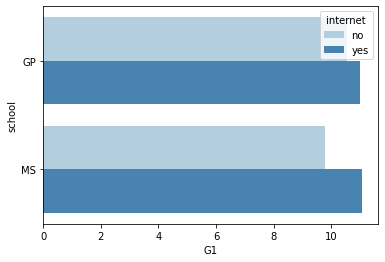

In [37]:
sns.barplot(data = base,
            estimator = np.mean,
            x = "G1", 
            y = "school",
            hue = "internet",
            ci = None,
            palette = "Blues" )

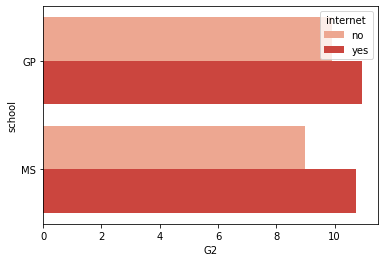

In [38]:
sns.barplot(data = base,
            estimator = np.mean,
            x = "G2", 
            y = "school",
            hue = "internet",
            ci = None,
            palette = "Reds" )

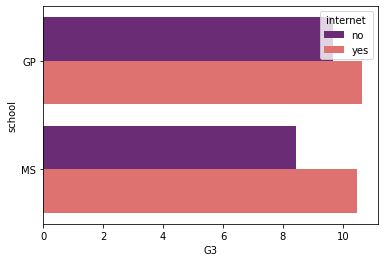

In [39]:
sns.barplot(data = base,
            estimator = np.mean,
            x = "G3", # Nota final, objetivo de rendimiento
            y = "school",
            hue = "internet",
            ci = None,
            palette = "magma" )

*Se aprecia que el colegio GP tiene mejor rendimiento academico sin internet pero con internet las dos instituciones son competentes y tienen valores de rendimiento aparentemente cercanos*

## Septimo punto
Cree una nueva variable en la tabla que corresponda a la calificación total para cada uno de los estudiantes y responda ¿Cuál es la media, mediana, mínima y máxima calificación total?

In [40]:
pip install dfply

In [41]:
from sklearn import datasets
from dfply import *
import numpy as np
import pandas as pd

In [42]:
base_editar = pd.read_csv('student-mat.csv', 
                 sep = ';',
                 index_col=False,
                 error_bad_lines=False,
                 )

In [44]:
BASE=(base_editar >> mutate(calificacion_total = X.G1 + X.G2 + X.G3))

In [45]:
BASE.head()

school sex  age address famsize  ... absences  G1  G2  G3 calificacion_total
0     GP   F   18       U     GT3  ...        6   5   6   6                 17
1     GP   F   17       U     GT3  ...        4   5   5   6                 16
2     GP   F   15       U     LE3  ...       10   7   8  10                 25
3     GP   F   15       U     GT3  ...        2  15  14  15                 44
4     GP   F   16       U     GT3  ...        4   6  10  10                 26

[5 rows x 34 columns]

In [46]:
BASE['calificacion_total'].describe()

count    395.000000
mean      32.037975
std       11.090357
min        4.000000
25%       25.000000
50%       32.000000
75%       40.000000
max       58.000000
Name: calificacion_total, dtype: float64

In [47]:
BASE['calificacion_total'].median()

32.0

*La media es: 32.037975, la mediana es: 32, la calificacion total minima es: 4, la calificacion total maxima es:  58*

## Octavo punto
Teniendo en cuenta que el dataset contiene tanto variables numéricas como variables categóricas responda ¿Qué tipo de análisis realizaría: Regresión o clasificación? Si fuera regresión o clasificación: ¿Qué variable usaría para predecir o clasificar? ¿Cuáles variables tiene la hipótesis que podrían servir para pronosticar o clasificar?

*Realizaría analisis de regresión, donde la variable a predecir sea la calificación promedio total de los estudiantes en el curso de matematicas y las variables que sirven como herramienta para lograr la prediccion son las calificaciones de cada corte y el numero de horas que dedica al estudio de las matematicas. Ademas de tener en cuenta el colegio al que pertenece el estudiante*